# Pyber Analysis

- Average rates in Rural areas are typically higher than those from urban areas
 - This may be due to the fact that points of interest in Rural areas are typically farther than those of urban areas 
- Although drivers in Rurual areas only account for 2.6% of the Pyber driver population, Rural fares acount for 6.8% of total fares and provide 5.3% of rides provided through Pyber
 - This indicates that drivers in Rural areas have the potential to make more than drivers in Urban areas even though Urban area account for 68.4% of Pyber rides
 - More revenue can be obtained if more riders switch to Pyber in the Rural areas and more drivers where there to assist them. This may be a focus area address





In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
all_data = pd.merge(ride_data, city_data,  how = "left", on = "city")
# Display the data table for preview
all_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

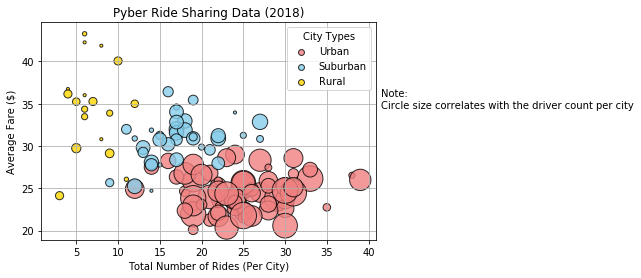

In [2]:
# Obtain the x and y coordinates for each of the three city types
#create Merged and Aggregated DF
city_types = all_data.groupby(["type", "city", "driver_count"]).agg({
    "fare": "mean", "ride_id": "count"}).reset_index()


#Create a DF for each City Type
urban_df = city_types.loc[city_types["type"] == "Urban"].reset_index(drop = True)
suburban_df = city_types.loc[city_types["type"] == "Suburban"].reset_index(drop = True)
rural_df = city_types.loc[city_types["type"] == "Rural"].reset_index(drop = True)


# Build the scatter plots for each city types
urban_plot = plt.scatter(urban_df["ride_id"], urban_df["fare"], s= urban_df["driver_count"] *9.5, alpha = .8,
                        color = "lightcoral", edgecolor = "black", label = urban_df.iloc[0,0])
suburban_plot = plt.scatter(suburban_df["ride_id"], suburban_df["fare"], s= suburban_df["driver_count"]*9.5, alpha = .8,
                            color = "skyblue", edgecolor = "black", label = suburban_df.iloc[0,0])
rural_plot = plt.scatter(rural_df["ride_id"], rural_df["fare"], s= rural_df["driver_count"]*9.5, alpha = .8,
                        color = "gold", edgecolor = "black", label = rural_df.iloc[0,0])


# Incorporate the other graph properties
plt.grid()

# Create a legend
legend = plt.legend(title = "City Types", loc = "best")

#Below code makes the legend markers all the same size. 
#https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]
legend.legendHandles[2]._sizes = [35]

# Incorporate a Title, axis labels, and text label regarding circle size
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.text(41.5,34.5, "Note: \nCircle size correlates with the driver count per city")


# Save Figure
plt.savefig("Pyber Ride Sharing Data (2018) Bubble Plot")
plt.show()

## Total Fares by City Type

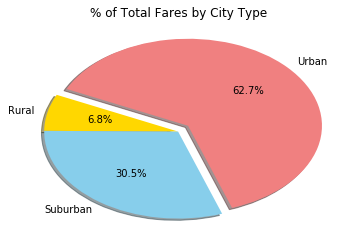

In [3]:
# Calculate Type Percents
#Do a groupby for City Type by sum of fares
type_fare_percent = all_data.groupby(["type"]).agg({"fare": "sum"}).reset_index()
type_fare_percent.head()

# Build Pie Chart
labels = type_fare_percent["type"]
explode = (0, 0, .1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(type_fare_percent["fare"], startangle = 155, autopct = "%1.1f%%", labels = labels, explode = explode, 
        shadow = True, colors = colors)
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("Total Fares by City Type Pie.png")
plt.show()

## Total Rides by City Type

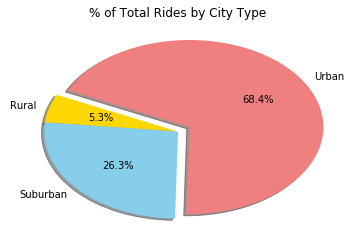

In [4]:
# Calculate Type Percents
#Do a groupby for City Type by count of Dates. This will get the number of rides given
type_rides_percent = all_data.groupby(["type"]).agg({"date": "count"}).reset_index()
type_rides_percent.head()

# Build Pie Chart
labels = type_rides_percent["type"]
explode = (0, 0, .1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(type_rides_percent["date"], startangle = 155, autopct = "%1.1f%%", labels = labels, explode = explode, 
        shadow = True, colors = colors)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total Rides by City Type Pie.png")
plt.show()

## Total Drivers by City Type

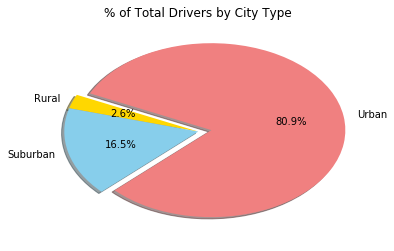

In [5]:
# Calculate Type Percents
#Do a groupby for City Type by sum of driver_count. Use the original DF for this one, merged DF includes double counting
type_driver_percent = city_data.groupby(["type"]).agg({"driver_count": "sum"}).reset_index()
type_driver_percent.head()

# Build Pie Chart
labels = type_driver_percent["type"]
explode = (0, 0, .1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(type_driver_percent["driver_count"], startangle = 155, autopct = "%1.1f%%", labels = labels, explode = explode, 
        shadow = True, colors = colors)
plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("Total Drivers by City Type Pie.png")
plt.show()